<a href="https://colab.research.google.com/github/Joaovtmendes/Dnc-engineer/blob/main/Car_price_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf

In [48]:
carPrice = pd.read_csv("/content/CarPrice_Assignment.csv")
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
carPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [50]:
le = LabelEncoder()

le.fit(carPrice.CarName)
carPrice.CarName = le.transform(carPrice.CarName)

le.fit(carPrice.fueltype)
carPrice.fueltype = le.transform(carPrice.fueltype)

le.fit(carPrice.aspiration)
carPrice.aspiration = le.transform(carPrice.aspiration)

le.fit(carPrice.doornumber)
carPrice.doornumber = le.transform(carPrice.doornumber)

le.fit(carPrice.carbody)
carPrice.carbody = le.transform(carPrice.carbody)

le.fit(carPrice.drivewheel)
carPrice.drivewheel = le.transform(carPrice.drivewheel)

le.fit(carPrice.enginelocation)
carPrice.enginelocation = le.transform(carPrice.enginelocation)

le.fit(carPrice.fuelsystem)
carPrice.fuelsystem = le.transform(carPrice.fuelsystem)

le.fit(carPrice.enginetype)
carPrice.enginetype = le.transform(carPrice.enginetype)

le.fit(carPrice.cylindernumber)
carPrice.cylindernumber = le.transform(carPrice.cylindernumber)


<Axes: xlabel='price', ylabel='Count'>

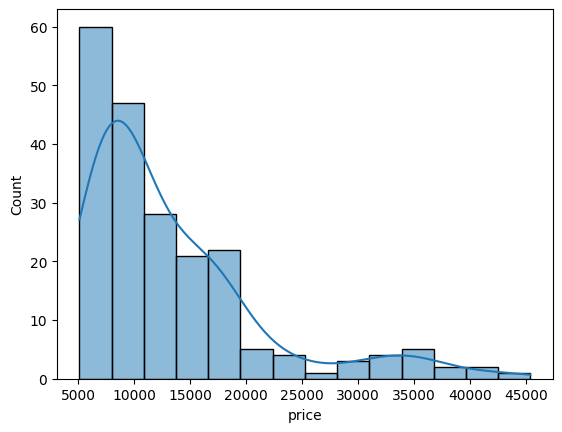

In [51]:
sns.histplot(carPrice, x ="price", kde=True)

<Axes: xlabel='CarName', ylabel='Count'>

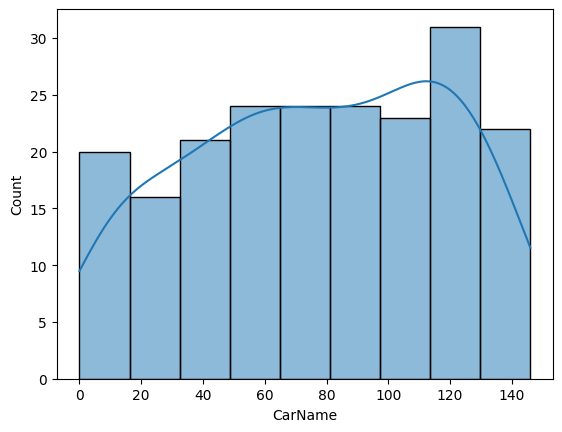

In [52]:
sns.histplot(carPrice, x ="CarName", kde=True)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

carN = pd.DataFrame(scaler.fit_transform(carPrice), index=carPrice.index, columns=carPrice.columns)

carN.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
carN.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [60]:
function="price~symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.26e-76
Time:                        10:25:13   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

In [61]:
function="price~CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     69.48
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.77e-77
Time:                        10:26:03   Log-Likelihood:                 275.53
No. Observations:                 205   AIC:                            -503.1
Df Residuals:                     181   BIC:                            -423.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1118      0.189  

In [62]:
function="price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.03
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           3.22e-78
Time:                        10:26:24   Log-Likelihood:                 275.52
No. Observations:                 205   AIC:                            -505.0
Df Residuals:                     182   BIC:                            -428.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0898      0.073  

In [63]:
function="price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     76.89
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           3.76e-79
Time:                        10:27:02   Log-Likelihood:                 275.47
No. Observations:                 205   AIC:                            -506.9
Df Residuals:                     183   BIC:                            -433.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0943      0.071  

In [64]:
function="price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     81.06
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           4.63e-80
Time:                        10:27:21   Log-Likelihood:                 275.34
No. Observations:                 205   AIC:                            -508.7
Df Residuals:                     184   BIC:                            -438.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0872      0.069  

In [65]:
function="price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     85.65
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           5.66e-81
Time:                        10:27:47   Log-Likelihood:                 275.18
No. Observations:                 205   AIC:                            -510.4
Df Residuals:                     185   BIC:                            -443.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0777      0.067  

In [66]:
function="price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     90.68
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           7.09e-82
Time:                        10:28:11   Log-Likelihood:                 274.97
No. Observations:                 205   AIC:                            -511.9
Df Residuals:                     186   BIC:                            -448.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0812      0.067  

In [67]:
function="price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     96.35
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           8.32e-83
Time:                        10:28:34   Log-Likelihood:                 274.79
No. Observations:                 205   AIC:                            -513.6
Df Residuals:                     187   BIC:                            -453.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0773      0.066  

In [68]:
function="price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     102.6
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.02e-83
Time:                        10:29:12   Log-Likelihood:                 274.54
No. Observations:                 205   AIC:                            -515.1
Df Residuals:                     188   BIC:                            -458.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0455      0.047  

In [69]:
function="price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     109.5
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.43e-84
Time:                        10:29:41   Log-Likelihood:                 274.09
No. Observations:                 205   AIC:                            -516.2
Df Residuals:                     189   BIC:                            -463.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0316      0.044  

In [70]:
function="price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.14e-85
Time:                        10:30:00   Log-Likelihood:                 273.54
No. Observations:                 205   AIC:                            -517.1
Df Residuals:                     190   BIC:                            -467.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0461      0.042  

In [72]:
function="price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm-1"
model = smf.ols(formula=function, data= carN).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):                   5.21e-116
Time:                        10:30:40   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [73]:
x = carN[["CarName","doornumber","carbody","drivewheel","enginelocation","carwidth","carheight","curbweight","enginesize","stroke","compressionratio","horsepower","peakrpm"]]

y = carN[["price"]]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(x,y)

LinearRegression();

In [75]:
r_sqd = lr.score(x,y)
r_sqd

0.8957104217461449

In [76]:
y_pred_train = lr.predict(x_train)
print("MAE:", metrics.mean_absolute_error(y_train,y_pred_train))
print("MSE:", metrics.mean_squared_error(y_train,y_pred_train))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE: 0.04760097445950692
MSE: 0.0036269034049875182
RMSE: 0.06022377773759728


In [77]:
y_pred_test = lr.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test,y_pred_test))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_test))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE: 0.04885199554631912
MSE: 0.005901961267238038
RMSE: 0.07682422318017956
